In [1]:
import pandas as pd
import numpy as np

## Series

In [2]:
x = [1, 2, 3, 4, 5]

In [5]:
np.array(x), np.array(x).dtype

(array([1, 2, 3, 4, 5]), dtype('int64'))

In [8]:
x_sr = pd.Series(x)

In [13]:
# 거꾸로 뒤집기 reverse
x_sr[::-1]

4    5
3    4
2    3
1    2
0    1
dtype: int64

In [14]:
# list 자료형에서도 사용 가능
x[::-1]

[5, 4, 3, 2, 1]

In [20]:
x_sr > 3

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [22]:
x_sr == 3

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [25]:
# boolean Indexing 작동 원리 
# 시리즈의 개수만큼 이루어진 bool 값으로 True인 부분만 남김
x_sr[ [False, False, False, True, False] ]

3    4
dtype: int64

In [ ]:
# broadcast 지원
x_sr + 1

In [ ]:
x_sr * 10

In [ ]:
x_sr ** x_sr

In [35]:
x_sr.index

RangeIndex(start=0, stop=5, step=1)

In [37]:
x_sr.values

array([1, 2, 3, 4, 5])

In [38]:
x_sr = pd.Series(x, index=['a', 'b', 'c', 'd', 'e'])

In [39]:
x_sr

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [40]:
x_sr.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [45]:
# 팬시 색인
x_sr[ ['c', 'e', 'a'] ]

c    3
e    5
a    1
dtype: int64

In [50]:
x_sr[1]

2

In [52]:
x_sr.a

1

In [53]:
# 딕셔너리로 시리즈 생성 시 key가 index로 들어간다.
score_dict = {'수학': 60, '컴퓨터': 80, '체육': 20, '과학': 40}

score_sr = pd.Series(score_dict)

In [66]:
score_sr['컴퓨터':'체육']

컴퓨터    80
체육     20
dtype: int64

In [67]:
score_sr = pd.Series(score_dict, index=['컴퓨터', '과학'])

In [68]:
score_sr

컴퓨터    80
과학     40
dtype: int64

In [76]:
student_1 = {'국어': 40, '수학':90, '영어':30, '과학':90, '물리': 70}
student_2 = {'국어': 90, '수학':80, '영어':70, '사회':80}

In [81]:
# Multi Index
index_1 = ['홍길동' for i in range(len(student_1))] + ['이몽룡' for i in range(len(student_2))]

In [80]:
index_2 = [key for key in student_1] + [key for key in student_2]

In [87]:
index_1

['홍길동', '홍길동', '홍길동', '홍길동', '홍길동', '이몽룡', '이몽룡', '이몽룡', '이몽룡']

In [88]:
index_2

['국어', '수학', '영어', '과학', '물리', '국어', '수학', '영어', '사회']

In [89]:
values = list(student_1.values()) + list(student_2.values())

In [90]:
scores_sr = pd.Series(values, index=[index_1, index_2])

In [97]:
scores_sr['홍길동']['국어']

40

In [99]:
scores_sr[('홍길동', '국어')]

40

In [98]:
scores_sr.index

MultiIndex([('홍길동', '국어'),
            ('홍길동', '수학'),
            ('홍길동', '영어'),
            ('홍길동', '과학'),
            ('홍길동', '물리'),
            ('이몽룡', '국어'),
            ('이몽룡', '수학'),
            ('이몽룡', '영어'),
            ('이몽룡', '사회')],
           )

In [100]:
x = [1, None, 2, None, 3, 4, None]
x_sr = pd.Series(x)

In [114]:
x_sr

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
5    4.0
6    NaN
dtype: float64

In [113]:
x_sr.sum()

10.0

In [115]:
x_sr.mean()

2.5

In [117]:
x_sr

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
5    4.0
6    NaN
dtype: float64

In [123]:
# 결측값의 개수를 세고 싶을 때 사용
x_sr.isnull().sum()

3

In [132]:
x_sr.fillna(0, inplace=True)

In [129]:
x_sr

0    1.0
1    0.0
2    2.0
3    0.0
4    3.0
5    4.0
6    0.0
dtype: float64

In [133]:
x = pd.Series([1, 2, 3])
y = pd.Series([4, 5, 6])
z = pd.Series([7, 8, 9])

In [136]:
x, y, z

(0    1
 1    2
 2    3
 dtype: int64, 0    4
 1    5
 2    6
 dtype: int64, 0    7
 1    8
 2    9
 dtype: int64)

In [142]:
# verify_integrity - index가 겹치는 것이 있는지 확인 후, 있으면 error
pd.concat([x, y, z], ignore_index=True, axis=1)

,0,1,2
0,1,4,7
1,2,5,8
2,3,6,9


In [148]:
x = pd.Series([1, 2, 3, 4])
y = pd.Series([4, 5, 6])
z = pd.Series([7, 8, 9])

In [149]:
# pd.concat([x, y, z], ignore_index=True, axis=1)
pd.concat([x, y, z], ignore_index=True, axis=1, join='outer')

,0,1,2
0,1,4.0,7.0
1,2,5.0,8.0
2,3,6.0,9.0
3,4,NaN,NaN


In [150]:
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([6, 7, 8, 9, 0])

In [177]:
x.floordiv(3)

0    0
1    0
2    1
3    1
4    1
dtype: int64

## DataFrame

In [178]:
sales_data = {
    '연도':[2015, 2016, 2017, 2018, 2019, 2020],
    '판매량':[103, 70, 130, 160, 190, 230],
    '매출':[500000, 300000, 400000, 550000, 700000, 680000],
    '순이익':[370000, 190000, 300000, 480000, 600000, 590000]
}

In [191]:
sales_df = pd.DataFrame(sales_data)

In [181]:
type(sales_df)

pandas.core.frame.DataFrame

In [192]:
sales_df

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [188]:
sales_df.iloc[1]

연도       2016
판매량        70
매출     300000
순이익    190000
Name: 1, dtype: int64

In [189]:
sales_df = pd.DataFrame(sales_data, columns=['판매량', '매출', '순이익'], index=sales_data['연도'])

In [190]:
sales_df

,판매량,매출,순이익
2015,103,500000,370000
2016,70,300000,190000
2017,130,400000,300000
2018,160,550000,480000
2019,190,700000,600000
2020,230,680000,590000


In [198]:
# 데이터프레임을 csv 파일로 쓰기
sales_df.to_csv('./sales_data.csv', index=None, encoding='utf-8-sig')

In [200]:
# 파일을 읽어와 데이터프레임으로 만들기
pd.read_csv('./sales_data.csv', index_col=0)

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000


In [204]:
sales_df['매출액str'] = sales_df['매출'].apply(lambda x: str(x)[:3] + ','+str(x)[3:])

In [207]:
sales_df.columns

Index(['연도', '판매량', '매출', '순이익', '매출액str'], dtype='object')

In [211]:
# 참고) seperate (구분자)의 기본값은 , 이나 \t 탭으로 분리한 tsv 형식도 가끔 사용 !
sales_df.to_csv('sales_data2.tsv', index=None, encoding='utf-8-sig', sep='\t')

In [212]:
pd.read_csv('./sales_data2.tsv', sep='\t')

,연도,판매량,매출,순이익,매출액str
0,2015,103,500000,370000,"500,000"
1,2016,70,300000,190000,"300,000"
2,2017,130,400000,300000,"400,000"
3,2018,160,550000,480000,"550,000"
4,2019,190,700000,600000,"700,000"
5,2020,230,680000,590000,"680,000"


In [251]:
sales_df = pd.DataFrame(sales_data)

In [228]:
# 새 칼럼 추가
sales_df['순이익률'] = [0 for i in range(len(sales_df))]

In [229]:
sales_df

,연도,판매량,매출,순이익,순이익률
0,2015,103,500000,370000,0
1,2016,70,300000,190000,0
2,2017,130,400000,300000,0
3,2018,160,550000,480000,0
4,2019,190,700000,600000,0
5,2020,230,680000,590000,0


In [230]:
sales_df['순이익률'] = (sales_df['순이익'] / sales_df['매출']) * 100

In [231]:
sales_df

,연도,판매량,매출,순이익,순이익률
0,2015,103,500000,370000,74.000000
1,2016,70,300000,190000,63.333333
2,2017,130,400000,300000,75.000000
3,2018,160,550000,480000,87.272727
4,2019,190,700000,600000,85.714286
5,2020,230,680000,590000,86.764706


In [232]:
def check(n):
    if n > 80:
        return '높음'
    else:
        return '낮음'

In [237]:
# 시리즈 apply 메서드를 통해 
# 1. 해당 시리즈의 값들을 
# 2. 하나씩 뒤의 check 함수에 넣어 
# 3. return 받은 결과값으로 이루어진 Series 생성
sales_df['순이익률_비교'] = sales_df['순이익률'].apply(check)

In [238]:
sales_df

,연도,판매량,매출,순이익,순이익률,순이익률_비교
0,2015,103,500000,370000,74.000000,낮음
1,2016,70,300000,190000,63.333333,낮음
2,2017,130,400000,300000,75.000000,낮음
3,2018,160,550000,480000,87.272727,높음
4,2019,190,700000,600000,85.714286,높음
5,2020,230,680000,590000,86.764706,높음


In [240]:
sales_df[sales_df['매출'] > 300000]

,연도,판매량,매출,순이익,순이익률,순이익률_비교
0,2015,103,500000,370000,74.000000,낮음
2,2017,130,400000,300000,75.000000,낮음
3,2018,160,550000,480000,87.272727,높음
4,2019,190,700000,600000,85.714286,높음
5,2020,230,680000,590000,86.764706,높음


In [242]:
sales_df['테스트1'] = np.where(sales_df['판매량']>200, 0, sales_df['판매량'])

In [243]:
sales_df

,연도,판매량,매출,순이익,순이익률,순이익률_비교,테스트1
0,2015,103,500000,370000,74.000000,낮음,103
1,2016,70,300000,190000,63.333333,낮음,70
2,2017,130,400000,300000,75.000000,낮음,130
3,2018,160,550000,480000,87.272727,높음,160
4,2019,190,700000,600000,85.714286,높음,190
5,2020,230,680000,590000,86.764706,높음,0


In [268]:
sales_df['테스트2'] = sales_df[sales_df['판매량'] < 100]['판매량'] + 50

In [281]:
sales_df = pd.DataFrame(sales_data)

In [282]:
sales_df.loc[6] = [2021, 260, 790000, 640000]

In [283]:
sales_df.loc[8] = sales_df.loc[5] + 100

In [285]:
sales_df.loc[7] = sales_df.loc[5] + 500

In [289]:
sales_df.loc[8]

연도       2120
판매량       330
매출     680100
순이익    590100
Name: 8, dtype: int64

In [288]:
sales_df.iloc[8]

연도       2520
판매량       730
매출     680500
순이익    590500
Name: 7, dtype: int64

In [279]:
sales_df.append({'연도':2022, '순이익':333, '매출':44444, '판매량':55555}, ignore_index=True)

,연도,판매량,매출,순이익
0,2015,103,500000,370000
1,2016,70,300000,190000
2,2017,130,400000,300000
3,2018,160,550000,480000
4,2019,190,700000,600000
5,2020,230,680000,590000
6,2021,260,790000,640000
7,2120,330,680100,590100
8,2120,330,680100,590100
9,2022,55555,44444,333


In [291]:
sales_df['테스트1'] = '테스트1'
sales_df['테스트2'] = '테스트2'
sales_df['테스트3'] = '테스트3'

In [293]:
del sales_df['테스트1']

In [295]:
sales_df.drop(['테스트2'], axis='columns', inplace=True)

In [299]:
drop_column = sales_df.columns[[0, 4]]

In [300]:
sales_df.drop(drop_column, axis='columns', inplace=True)

In [302]:
sales_df.drop(8, inplace=True)

In [304]:
sales_df.drop([3, 4, 5], inplace=True)

In [305]:
sales_df

,판매량,매출,순이익
0,103,500000,370000
1,70,300000,190000
2,130,400000,300000
6,260,790000,640000
7,730,680500,590500


In [309]:
df = pd.DataFrame(np.random.randint(1, 100, size=(4, 4)),
             index= [ ['AA', 'AA', 'BB', 'BB'], ['a', 'b', 'a', 'b']],
             columns= [ ['가가', '가가', '나나', '나나'], ['가', '나', '가', '나'] ])

In [316]:
df['가가']['가']

AA  a    38
    b    30
BB  a    61
    b    81
Name: 가, dtype: int64

In [325]:
df

가가      나나    
       가   나   가   나
AA a  38  20  91  47
   b  30  20  87  84
BB a  61  59  76  53
   b  81  37  41  46

In [326]:
df.iloc[2]

가가  가    61
    나    59
나나  가    76
    나    53
Name: (BB, a), dtype: int64

In [327]:
df.index, df.columns

(MultiIndex([('AA', 'a'),
             ('AA', 'b'),
             ('BB', 'a'),
             ('BB', 'b')],
            ), MultiIndex([('가가', '가'),
             ('가가', '나'),
             ('나나', '가'),
             ('나나', '나')],
            ))

In [329]:
df = pd.DataFrame(np.random.randint(1, 100, size=(8, 2)),
    index=[['A창고','A창고','A창고','A창고','B창고','B창고','B창고','B창고'],
            ['사과','배','바나나','사과','사과','배','바나나','배']],
    columns=['판매','재고'])
df

판매  재고
A창고 사과   63  31
    배    54  54
    바나나  83  97
    사과   57  87
B창고 사과   72  88
    배    50  16
    바나나  52  40
    배    28  65

In [330]:
df.index.names = ['창고명', '상품명']
df

판매  재고
창고명 상품명        
A창고 사과   63  31
    배    54  54
    바나나  83  97
    사과   57  87
B창고 사과   72  88
    배    50  16
    바나나  52  40
    배    28  65

In [332]:
# groupby - 집계
df.groupby('창고명').sum()

,판매,재고
창고명,,
A창고,257,269
B창고,202,209


In [333]:
df.groupby('상품명').sum()

,판매,재고
상품명,,
바나나,135,137
배,132,135
사과,192,206


In [336]:
df.groupby(['창고명', '상품명']).count()

판매  재고
창고명 상품명        
A창고 바나나   1   1
    배     1   1
    사과    2   2
B창고 바나나   1   1
    배     2   2
    사과    1   1

In [339]:
# 정렬
df.sort_values(by=['판매'], ascending=[True])

판매  재고
창고명 상품명        
B창고 배    28  65
    배    50  16
    바나나  52  40
A창고 배    54  54
    사과   57  87
    사과   63  31
B창고 사과   72  88
A창고 바나나  83  97

In [ ]:
# 실습 01

In [2]:
import numpy as np
import pandas as pd

In [35]:
x = [np.nan,1,2,3,4,5]
y = pd.Series([ x[np.random.randint(0,6)] for i in range(100000)] )

In [ ]:
# 1. 결측값의 개수를 구하고

In [7]:
y # 6
y.isnull().sum()

6

In [ ]:
# 2. 결측값을 제거한 Series를 만들고

In [38]:
import time

start_time = time.time()
y[~y.isna()]
print(time.time() - start_time)

start_time = time.time()
y.dropna()
print(time.time() - start_time)

0.005057334899902344
0.0021386146545410156


In [ ]:
# y[~y.isna()] vs y.dropna()

In [8]:
y.dropna()

0     1.0
1     5.0
2     2.0
3     4.0
4     3.0
6     4.0
8     3.0
10    4.0
12    4.0
13    3.0
15    3.0
16    4.0
18    5.0
19    2.0
dtype: float64

In [ ]:
# 3. 결측값에 y의 평균값을 넣은 Series를 만들어주세요.

In [9]:
mean_value = y.mean()

3.357142857142857

In [ ]:
y.fillna(y.mean())

In [ ]:
# 실습 02

In [42]:
index_1 = ['1학년'] * 5 + ['2학년'] * 5 + ['3학년'] * 5
index_2 = [str(i)+'반' for i in range(1, 6)] * 3
columns = ['국어', '영어', '과학']
values = np.random.randint(1, 100, size=(15, 3))

school_df = pd.DataFrame(values, index=[index_1, index_2], columns=columns)

In [ ]:
school_df

In [ ]:
# 반별 합계와 평균을 추가해주세요.

In [44]:
school_df['총점'] = school_df['국어'] + school_df['영어'] + school_df['과학']

In [ ]:
school_df[school_df.columns[:3]].sum(axis=1)

In [46]:
school_df['평균'] = school_df['총점']/3

In [ ]:
school_df

In [49]:
school_df.index.names = ['학년', '반']

In [51]:
school_df.groupby('학년').sum()

,국어,영어,과학,총점,평균
학년,,,,,
1학년,199,154,203,556,185.333333
2학년,299,238,206,743,247.666667
3학년,395,244,299,938,312.666667


In [ ]:
# 실습 03 - 타이타닉 생존자 EDA
# 데이콘 or kaggle에서 파일 다운로드 받아서 활용 !

In [57]:
titanic_df = pd.read_csv('./train.csv')

In [59]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
titanic_df.head(1).T

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [63]:
age_mean = titanic_df['Age'].mean()
titanic_df['Age'].fillna(age_mean, inplace=True)

In [65]:
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [ ]:
titanic_df.isnull().sum()

In [67]:
titanic_df.head(1).T

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [79]:
titanic_df.groupby('Sex').count()['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64

In [68]:
titanic_df.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex'>

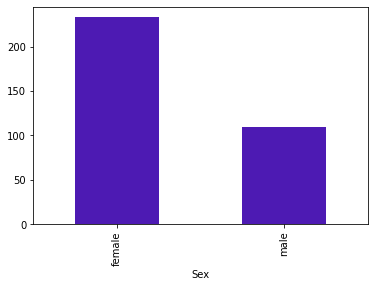

In [75]:
titanic_df.groupby('Sex').sum()['Survived'].plot(kind='bar', color=[0.3, 0.1, 0.7])

In [80]:
titanic_df.groupby('Pclass').count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [89]:
pclass_df = titanic_df.groupby('Pclass').sum()['Survived']

In [90]:
pclass_df

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

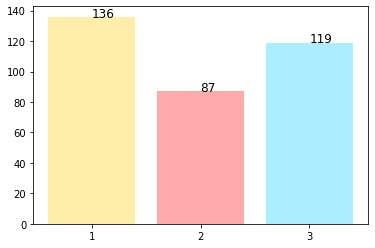

In [103]:
import matplotlib.pyplot as plt
x = pclass_df.index.astype(str)
y = pclass_df.values
plt.bar(x=x, height=y, color=['#fea', '#faa', '#aef'])
for idx in range(len(x)):
  plt.text(x[idx], y[idx], y[idx], size=12)
plt.show()

In [84]:
def age_change(age):
    if age >= 70:
        return '노인'
    elif age >= 10:
        return str(int(age//10)) + '0대'
    return '유아'

In [85]:
titanic_df['AgeRange'] = titanic_df['Age'].apply(age_change)

In [88]:
titanic_df.groupby('AgeRange').sum()['Survived']

AgeRange
10대     41
20대    129
30대     73
40대     34
50대     20
60대      6
노인       1
유아      38
Name: Survived, dtype: int64